# **Project 2**, APS1070 Winter 2021
**Anomaly Detection Algorithm using Gaussian Mixture Model [15 Marks]**

**Deadline: Feb 27, 11 PM - 15 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Alexander Cheng
*   Student Number: 1001634298

##**Part 1: Getting started [2 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? **[0.1]** 284807
* What features in the dataset are present aside from the 28 main features?   **[0.1]** Time, Amount, Class (A Target, not a feature)
* Which column contains the targets? **[0.1]** Class
* To what do the target values correspond? **[0.1]** 0 is normal transaction, 1 is fraud transaction (Since occurance of 0 >> 1)

In [689]:
pip install wget

In [690]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (9).gz'

In [691]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [692]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [693]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [694]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


It's important when looking at a new dataset to figure out how many examples we have for each class.

* What is the percentage of entries in the dataset for each class?  **[0.1]**

99.82% Normal transaction, 0.1727% Fraud transactions
* Is this data considered balanced or unbalanced? Why is this the case? **[0.1]**

This data is considered unbalanced because there is so much more normal transaction compared to fraud transactions 
* Why is balance/imbalance important? How might this class distribution affect a KNN classifier for example, which we explored in Project 1? **[0.2]**

Balance is important because it allows us to measure our accuracy using only the accuracy value. If it's imbalanced and we choose the majority class (normal transaction), your accuracy will still show a good value since even if you have guessed only normal transactions, you're still 99% correct. In this case especially, it is critical to identify a fraud transaction since it has much more consequences.



In [695]:
df['Class']

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [696]:
Valid = np.sum(df['Class'] ==0)
Fraud = np.sum(df['Class'] ==1)
print(Valid)
print(Fraud)
print(Fraud / (Valid + Fraud)*100)
print(Valid / (Valid + Fraud)*100)

284315
492
0.1727485630620034
99.82725143693798


In [697]:
target = df['Class']*1

In [698]:
# Unsure if need to drop these features
# df.drop('Time', axis=1, inplace=True)
# df.drop('Amount', axis=1, inplace=True)

Next, split the dataset into a training (70%) and testing set (30%). Set the random state to 0.**[0.2]**

Make sure to separate out the column corresponding to the targets.

In [699]:
### Split the data  ###
pd.options.mode.chained_assignment = None  # default='warn'
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3, random_state=0)
X_traincopy = X_train*1
X_train.drop('Class', axis=1, inplace=True)

Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

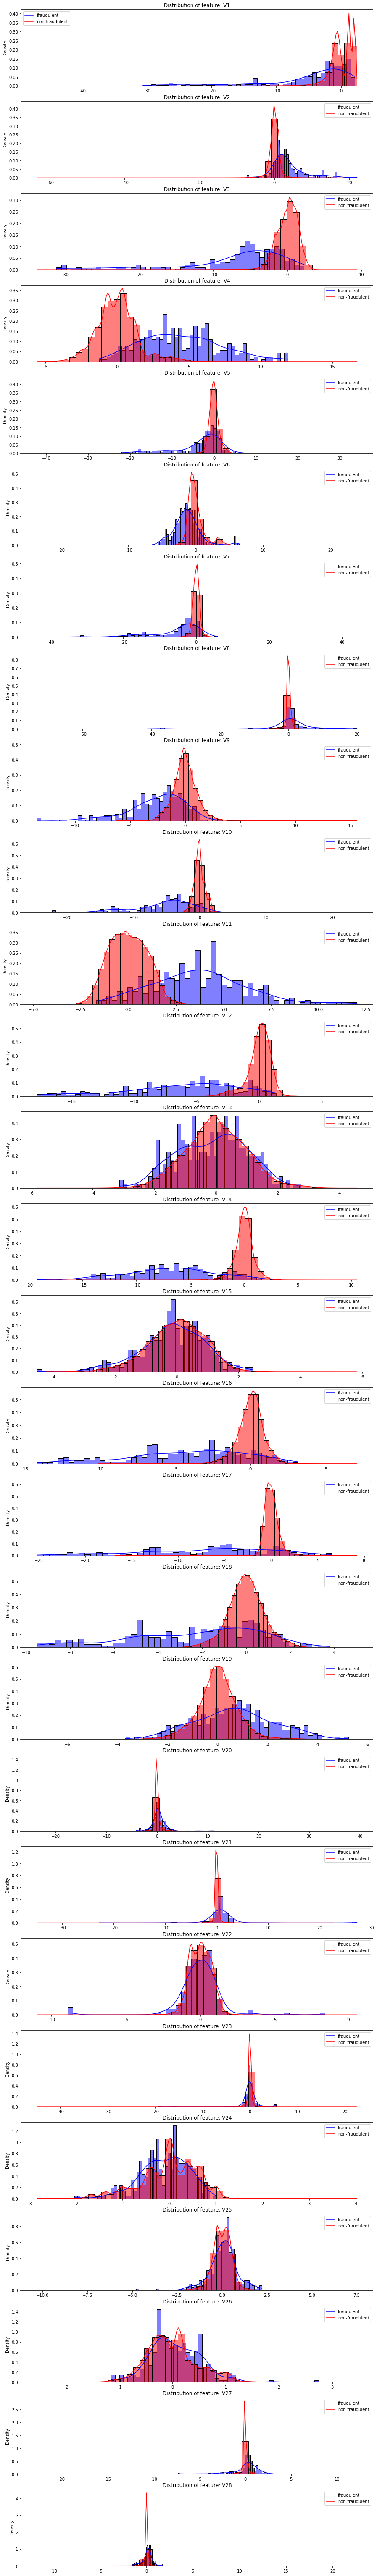

In [700]:
#Graphing density distribution in a histogram for each feature

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[1]**

These graphs provide us the mean and standard deviation that we will use to create a gaussian model. We want the means of the normal transaction and fraud transaction to be largely distinct from each other to clearly classify from one another. We also want the curve to have small standard deviations as to not overlap with each other. 
We can also check the distribution of the data, whether it follows a Gaussian distribution or if multiple Gaussians are requires to distinctly seperate them.
We can see which features do this which will be useful to seperate between the normal and fraud transactions. 

## **Part 2: Single feature model with one Gaussian distribution: [2.5 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on the full training set (including both classes).  **[0.25]**
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.5]**
  4. Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC. **[0.25]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score in the training set. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**

  6. If we fit our Gaussian on only non-fraudulent transactions instead of the whole training set (in step 1), how would that change our model's performance? why? Experiment and explain! **[0.75]**



In [701]:
#Fitting Single Guassian Distribution on a single feature of the full training dataset
from sklearn.mixture import GaussianMixture 

gm = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm.fit(X_train['V1'].values.reshape(-1,1))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [702]:
#Calculating the Area Under the ROC Curve(AUC)

from sklearn.metrics import roc_auc_score

p = gm.score_samples(X_train['V1'].values.reshape(-1,1))
roc_auc_score(y_train, 1-p)

0.7051015812269326

In [703]:
#Calculating the Area Under the ROC Curve(AUC) for all features

#Convert to np array
X_train_array = X_train.values
AUC_total = np.zeros(30)
for i in range(0,30):
  gm = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
  gm.fit(X_train_array[:, i].reshape(-1,1))

  p = gm.score_samples(X_train_array[:, i].reshape(-1,1))
  AUC_total[i] = roc_auc_score(y_train, 1-p)
print(AUC_total)

[0.5107263  0.70510158 0.83749934 0.87653733 0.89210269 0.77182535
 0.73437992 0.86296662 0.77323833 0.80287435 0.91359974 0.89717518
 0.92018016 0.57215159 0.95245862 0.51476449 0.90213678 0.93485199
 0.80802985 0.74187407 0.73469174 0.83352103 0.56128726 0.69632636
 0.46922884 0.57491803 0.50327168 0.83547881 0.81420061 0.62740178]


In [704]:
print(AUC_total.max())
print(AUC_total.argmax())

0.9524586211308497
14


We see that feature 14 has the highest AUC, easiest to distinguish between frauduant and valid , AUC for Feature 14 is 0.95246

In [705]:
AUC_total = pd.DataFrame({'Feature': X_train.columns,
                          'AUC': AUC_total
                          })

In [706]:
#Features with corresponding AUC in a table

AUC_total

,Feature,AUC
0,Time,0.510726
1,V1,0.705102
2,V2,0.837499
3,V3,0.876537
4,V4,0.892103
5,V5,0.771825
6,V6,0.734380
7,V7,0.862967
8,V8,0.773238
9,V9,0.802874


In [707]:
#Calculating for Feature 14, p is the log probability of a normal datapoint
#Fit Feature 14 to a gaussian model, find p

gm = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm.fit(X_train_array[:, 14].reshape(-1,1))
p_P2 = gm.score_samples(X_train['V14'].values.reshape(-1,1))
p_P2_sorted = np.sort(p_P2)
print(p_P2_sorted)

[-202.460939   -194.31470082 -185.5773611  ...   -0.87492008   -0.87492008
   -0.87492008]


In [708]:
#Calculating the optimal thresold that provides us the maximum F1_Score

from sklearn.metrics import f1_score

j = 0

F1_Score = np.zeros(200)
#Count every 5
for i in range(0, round(len(X_train_array)*0.01), 5):
  threshold = p_P2_sorted[i+1]
  F1_Score[j] = f1_score(y_train, p_P2 < threshold)
#Can stop when F_score decreases (smaller than the next 5 to avoid local min)
  if(F1_Score[j] < F1_Score[j-1]) and (F1_Score[j] < F1_Score[j-5]) and (j >1):
    break
  j = j+1

print(F1_Score)
print(F1_Score.max())

[0.00578035 0.02849003 0.05617978 0.08310249 0.10928962 0.12938005
 0.14893617 0.167979   0.18134715 0.19948849 0.22222222 0.24438903
 0.26108374 0.28223844 0.29326923 0.304038   0.31455399 0.32946636
 0.3440367  0.35827664 0.367713   0.38137472 0.39473684 0.39824945
 0.4248927  0.43312102 0.44537815 0.45738046 0.47325103 0.48879837
 0.5        0.51497006 0.51778656 0.52837573 0.52713178 0.52975048
 0.52851711 0.5386064  0.54850746 0.54343808 0.54212454 0.54809437
 0.55395683 0.55614973 0.55830389 0.56392294 0.56597222 0.56798623
 0.56996587 0.57529611 0.58053691 0.57903494 0.57755776 0.57610475
 0.57792208 0.58615137 0.59105431 0.59904913 0.61006289 0.61154446
 0.60990712 0.60829493 0.61280488 0.61422088 0.60960961 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0

Optimal threshold is -20.0616 for a maximum F1_Score of 0.6142208774583964



In [709]:
print(F1_Score.max())
print(np.argmax(F1_Score))
print(p_P2_sorted[(np.argmax(F1_Score))*5+1])
print(np.argmax(F1_Score)*5 +1)

#Optimal Threshold is -20.0616
#If j = 63, i = 63*5, i+1 = 316

0.6142208774583964
63
-20.061583821063316
316


In [710]:
X_trainP2 = X_traincopy*1

In [711]:
#Finding index with Normal transactions

Non_Outliers= X_trainP2[X_trainP2['Class'] !=1]
X_trainP2Normal = X_trainP2.drop(X_trainP2[X_trainP2['Class']==1].index)
X_trainP2.drop('Class', axis=1, inplace=True)
X_trainP2Normal.drop('Class', axis=1, inplace=True)

In [712]:
#Fit Gaussian model only to normal transactions (Remove the fraud transactions)

gm_P2 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm_P2.fit(X_trainP2Normal['V14'].values.reshape(-1,1))

p_P2Normal = gm_P2.score_samples(X_trainP2['V14'].values.reshape(-1,1))
p_P2_Normal_sorted = np.sort(p_P2Normal)

#Finding AUC and assuming feature 14 is still the best feature
print(roc_auc_score(y_train, 1-p_P2Normal))

X_trainP2_array = X_trainP2.values

j = 0

F1_Score_P2 = np.zeros(200)
for i in range(0, round(len(X_trainP2_array)*0.01), 5):
  threshold = p_P2_Normal_sorted[i+1]
  F1_Score_P2[j] = f1_score(y_train, p_P2Normal < threshold)
  if(F1_Score_P2[j] < F1_Score_P2[j-1]) and (F1_Score_P2[j] < F1_Score_P2[j-5]) and (j >1):
    break
  j = j+1

print(F1_Score_P2)

0.9525990781886603
[0.00578035 0.02849003 0.05617978 0.08310249 0.10928962 0.12938005
 0.14893617 0.167979   0.18134715 0.19948849 0.22222222 0.24438903
 0.26108374 0.28223844 0.29326923 0.3087886  0.31455399 0.32946636
 0.3440367  0.35827664 0.367713   0.38137472 0.39473684 0.39824945
 0.4248927  0.43312102 0.44537815 0.45738046 0.47325103 0.48879837
 0.5        0.51497006 0.51778656 0.52837573 0.52713178 0.52975048
 0.52851711 0.5386064  0.54850746 0.54343808 0.54212454 0.54809437
 0.55395683 0.55614973 0.55830389 0.56392294 0.56597222 0.56798623
 0.56996587 0.57529611 0.58053691 0.57903494 0.58085809 0.57937807
 0.58116883 0.58615137 0.59105431 0.59904913 0.61006289 0.61154446
 0.60990712 0.60829493 0.61280488 0.61422088 0.61261261 0.61102832
 0.60946746 0.60677467 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.     

In [713]:
print(F1_Score_P2.max())
print(np.argmax(F1_Score_P2))
print(p_P2_Normal_sorted[(np.argmax(F1_Score_P2))*5+1])
print(np.argmax(F1_Score_P2)*5 +1)

0.6142208774583964
63
-22.65328845855815
316


Doesn't make much of a difference since there are so many normal transactions compared to the fraud transactions, minimal improvement. 

The AUC value slightly increased.

Optimal threshold is -22.65 and the maximum F1_Score is 0.6142. If we were to implement more Gaussian distributions, it will have more of an effect. But by removing the fraud transactions, there is no fraud transaction to fit the data on.

## **Part 3: Multiple feature model with one Gaussian distribution: [2.5 Marks]**
This part is similar to Part 2, but here we will pick two features and set the number of components visually.

 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot color the data-points based on their class (non-fraudulents blue and fraudulents red). **[0.25]**
 4. Based on your plots decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). Explain.  **[0.5]**
 5. Fit your Gaussian model on all the data-points. **[0.25]**
 6. Compute AUC **[0.25]**
 7. Pick 3 new sets of features and repeat steps 2 to 6. **[0.5]**
 8. Pick the set with the highest AUC.
 9. Find a threshold to maximize your F1 Score.**[0.25]**
 10. Plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**




0.8684057475831999


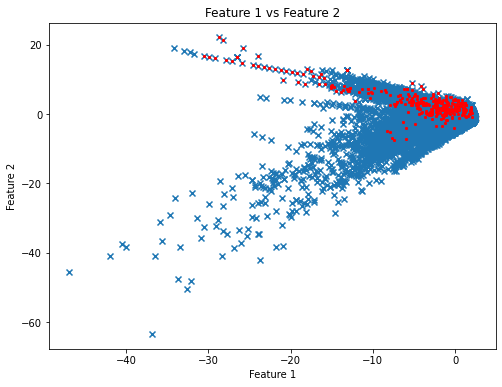

In [714]:
### Features 1-2

#Scatter plot featue 1 and 2
plt.figure(figsize=(8,6))
X_trainP3_array = X_traincopy.values
plt.scatter(X_trainP3_array[:,1],X_trainP3_array[:,2],marker="x")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Feature 1 vs Feature 2')

#Isolating the frauds
Outliers= X_traincopy['Class'] ==1
plt.scatter(X_trainP3_array[Outliers,1],X_trainP3_array[Outliers,2],marker="x",facecolor="red",edgecolor="r",s=5);

X_trainP3 = X_trainP2*1

#Fitting data onto 2 Gaussian components
gm_P3 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )

gm_P3.fit(X_trainP3[['V1', 'V2']].values)

p_P3 = gm_P3.score_samples(X_trainP3[['V1', 'V2']].values)

AUC_total_P3 = roc_auc_score(y_train, 1-p_P3)

print(AUC_total_P3)

From the plot, it's a bit difficult to determine the number of Gaussian components to fit the data. Since there's so much valid transactions. Most of the data is centered around 2 clusters.

0.928931277481263


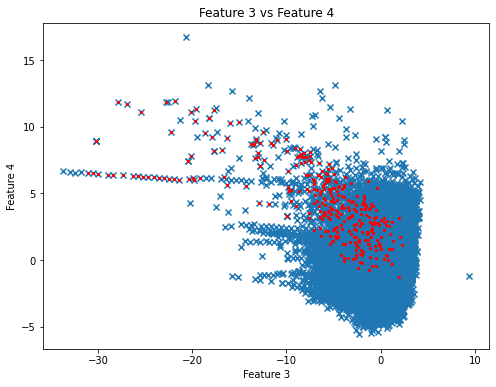

In [715]:
### Features 3-4

plt.figure(figsize=(8,6))
X_trainP3_array = X_traincopy.values
plt.scatter(X_trainP3_array[:,3],X_trainP3_array[:,4],marker="x")
plt.xlabel('Feature 3')
plt.ylabel('Feature 4')
plt.title('Feature 3 vs Feature 4')

#Isolating the frauds
Outliers= X_traincopy['Class'] ==1
plt.scatter(X_trainP3_array[Outliers,3],X_trainP3_array[Outliers,4],marker="x",facecolor="red",edgecolor="r",s=5);

X_trainP3 = X_trainP2*1

#Fitting data onto 2 Gaussian components
gm_P3 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )

gm_P3.fit(X_trainP3[['V3', 'V4']].values)

p_P3 = gm_P3.score_samples(X_trainP3[['V3', 'V4']].values)

AUC_total_P3 = roc_auc_score(y_train, 1-p_P3)

print(AUC_total_P3)

0.8250892511828489


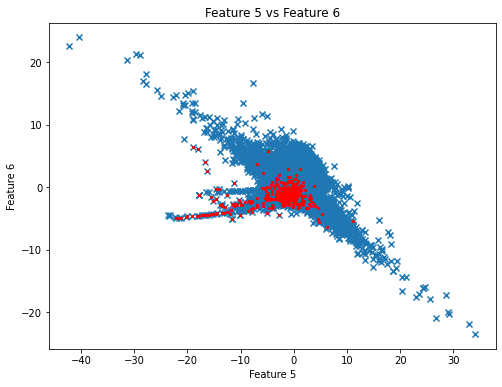

In [716]:
### Features 5-6

plt.figure(figsize=(8,6))
X_trainP3_array = X_traincopy.values
plt.scatter(X_trainP3_array[:,5],X_trainP3_array[:,6],marker="x")
plt.xlabel('Feature 5')
plt.ylabel('Feature 6')
plt.title('Feature 5 vs Feature 6')

#Isolating the frauds
Outliers= X_traincopy['Class'] ==1
plt.scatter(X_trainP3_array[Outliers,5],X_trainP3_array[Outliers,6],marker="x",facecolor="red",edgecolor="r",s=5);

X_trainP3 = X_trainP2*1

#Fitting data onto 2 Gaussian components
gm_P3 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )

gm_P3.fit(X_trainP3[['V5', 'V6']].values)

p_P3 = gm_P3.score_samples(X_trainP3[['V5', 'V6']].values)

AUC_total_P3 = roc_auc_score(y_train, 1-p_P3)

print(AUC_total_P3)

0.9624679633311538


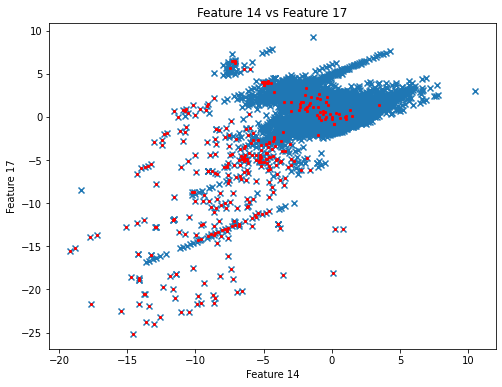

In [717]:
### Features 14, 17 (Highest AUC Features in part 2)

plt.figure(figsize=(8,6))
X_trainP3_array = X_traincopy.values
plt.scatter(X_trainP3_array[:,14],X_trainP3_array[:,17],marker="x")
plt.xlabel('Feature 14')
plt.ylabel('Feature 17')
plt.title('Feature 14 vs Feature 17')

#Isolating the frauds
Outliers= X_traincopy['Class'] ==1
plt.scatter(X_trainP3_array[Outliers,14],X_trainP3_array[Outliers,17],marker="x",facecolor="red",edgecolor="r",s=5);

X_trainP3 = X_trainP2*1

#Fitting data onto 2 Gaussian components
gm_P3 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )

gm_P3.fit(X_trainP3[['V14', 'V17']].values)

p_P3 = gm_P3.score_samples(X_trainP3[['V14', 'V17']].values)

AUC_total_P3 = roc_auc_score(y_train, 1-p_P3)

print(AUC_total_P3)

This set has the highest AUC of 0.9625 and will be used to calculate threshold

In [718]:
#Find threshold for optimal F1_Score

p_P3_sorted = np.sort(p_P3)

j = 0

F1_Score_P3 = np.zeros(200)
#Count every 5
for i in range(0, round(len(X_train_array)*0.01), 5):
  threshold = p_P3_sorted[i+1]
  F1_Score_P3[j] = f1_score(y_train, p_P3 < threshold)
  #Can stop when F_score decreases (smaller than the next 5 to avoid local min)
  if(F1_Score_P3[j] < F1_Score_P3[j-1]) and (F1_Score_P3[j] < F1_Score_P3[j-5]) and (j >1):
    break
  j = j+1

print(F1_Score_P3)

[0.00578035 0.03418803 0.06179775 0.08864266 0.1147541  0.14016173
 0.16489362 0.18897638 0.20207254 0.21483376 0.22727273 0.23441397
 0.2364532  0.24878049 0.27403846 0.28503563 0.30516432 0.32482599
 0.3440367  0.36281179 0.37668161 0.38392857 0.40789474 0.42516269
 0.44206009 0.45859873 0.47478992 0.48232848 0.48971193 0.50101833
 0.50403226 0.51497006 0.5256917  0.53228963 0.53488372 0.54126679
 0.54372624 0.54990584 0.55534709 0.5767098  0.57875458 0.58439201
 0.59352518 0.59536542 0.59363958 0.59194396 0.59375    0.59552496
 0.59726962 0.59898477 0.60402685 0.61231281 0.62046205 0.63175123
 0.63961039 0.63768116 0.64536741 0.64976228 0.65408805 0.66146646
 0.6625387  0.66359447 0.67073171 0.67170953 0.67867868 0.68554396
 0.68639053 0.68135095 0.68221574 0.68596237 0.68103448 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.  

In [719]:
print(F1_Score_P3.max())
print(np.argmax(F1_Score_P3))
print(p_P2_sorted[(np.argmax(F1_Score_P3))*5+1])
print(np.argmax(F1_Score_P3)*5 +1)

0.6863905325443788
66
-19.38337938072507
331


Optimal threshold is -19.3833 with a maximum F1_score of 0.6864 - we do see improvement to the F1_Score compared to just 1 gaussian component

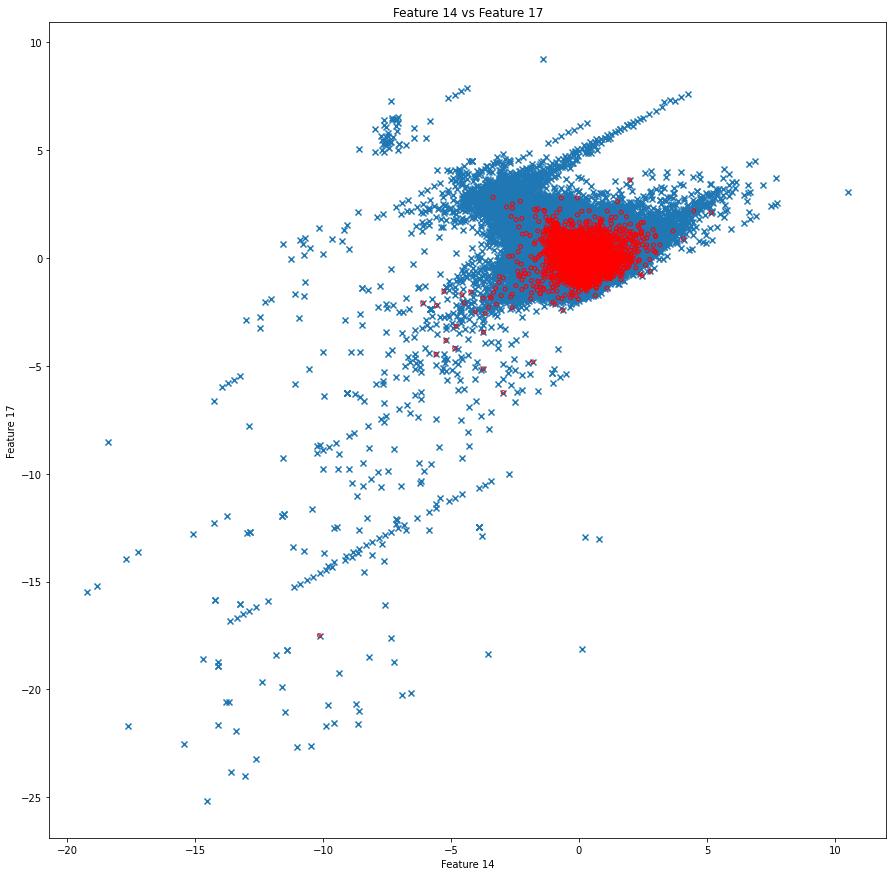

In [720]:
plt.figure(figsize=(15,15))
X_trainP3_array = X_traincopy.values
plt.scatter(X_trainP3_array[:,14],X_trainP3_array[:,17],marker="x")
plt.xlabel('Feature 14')
plt.ylabel('Feature 17')
plt.title('Feature 14 vs Feature 17')

outliers = np.nonzero(p<threshold)[0]
plt.scatter(X_trainP3_array[outliers,14],X_trainP3_array[outliers,17],marker="o",facecolor="none",edgecolor="r",s=15);

From the plot, it seems that most of the fraud transaction fit onto a cluster - if we can fit a gaussian model for the false transactions, it'll be easy to identify 


## **Part 4: Single feature model with two Gaussian distributions. [3 Marks]**
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **whole training set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.5]**
  5. Repeat the steps above for all the features. What is the best F1 Score that you get? Which feature and what c? **[1]**

In [721]:
### Fitting Gaussian Distribution to fraud and non-fraud 
X_trainP4_Normal = X_traincopy*1
X_trainP4_Fraud = X_traincopy*1

X_trainP4_Normal = X_trainP4_Normal.drop(X_trainP4_Normal[X_trainP4_Normal['Class']==1].index)
X_trainP4_Normal.drop('Class', axis=1, inplace=True)

X_trainP4_Fraud = X_trainP4_Fraud.drop(X_trainP4_Fraud[X_trainP4_Fraud['Class']==0].index)
X_trainP4_Fraud.drop('Class', axis=1, inplace=True)

G1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
G1.fit(X_trainP4_Normal['V14'].values.reshape(-1,1))

G2 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
G2.fit(X_trainP4_Fraud['V14'].values.reshape(-1,1))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [722]:
#Calcualting Score Samples
S1 = G1.score_samples(X_train['V14'].values.reshape(-1,1))
S2 = G2.score_samples(X_train['V14'].values.reshape(-1,1))

In [723]:
import numpy as np

j = 0

F1_Score_P4 = np.zeros(200)
for i in np.arange(-5, 15, 0.1):
  F1_Score_P4[j] = f1_score(y_train, S1 < (i* S2))
  # if(F1_Score_P4[j] < F1_Score_P4[j-1]) and (F1_Score_P4[j] < F1_Score_P4[j-5]) and (j >1):
  #   break
  j = j+1

print(F1_Score_P4)
print(F1_Score_P4.max())

[0.00345503 0.00345503 0.00345503 0.00345503 0.00345503 0.00345503
 0.00345503 0.00345503 0.00345503 0.00345503 0.00345503 0.00345503
 0.00345503 0.00345503 0.00345503 0.00345503 0.00345503 0.00345503
 0.00345503 0.00345503 0.00345503 0.00345503 0.00345503 0.00345503
 0.00345503 0.00345503 0.00345503 0.00345503 0.00345503 0.00345503
 0.00345503 0.00345503 0.00345503 0.00345503 0.00345503 0.00345503
 0.00345503 0.00345503 0.00345503 0.00345503 0.00345503 0.00345503
 0.00345503 0.00345503 0.00345503 0.00345503 0.00345503 0.00345503
 0.00345503 0.00345503 0.00345503 0.00345503 0.00345503 0.0103714
 0.01757926 0.02597729 0.03755982 0.05093127 0.06419026 0.07806501
 0.09034784 0.1024231  0.11510236 0.12859926 0.14138509 0.15466102
 0.17117647 0.1875     0.20208333 0.21937429 0.23246493 0.24649384
 0.26126126 0.26917647 0.28657315 0.30563003 0.32608696 0.34953846
 0.36979167 0.38930775 0.40687679 0.42501884 0.4428684  0.45874587
 0.47440273 0.49244444 0.50501367 0.51643192 0.52702703 0.53543

In [724]:
print(F1_Score_P4.max())
print(np.argmax(F1_Score_P4))
c = (np.argmax(F1_Score_P4))*0.1 + -5
print(c)

0.6353677621283255
147
9.700000000000001


Optimal c is 9.7 for a maximum F1_score of 0.63536 for Feature 14 (Feature with highest AUC from Part 2)







In [725]:
#For Loop - Repeat for all features (Note: This loop takes a while to run)

for x in range (1, 29):
  G1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
  G1.fit(X_trainP4_Normal[X_train.columns[x]].values.reshape(-1,1))



  G2 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
  G2.fit(X_trainP4_Fraud[X_train.columns[x]].values.reshape(-1,1))

  S1 = G1.score_samples(X_train[X_train.columns[x]].values.reshape(-1,1))
  S2 = G2.score_samples(X_train[X_train.columns[x]].values.reshape(-1,1))
  j = 0

  F1_Score = np.zeros(200)
  for i in np.arange(-5, 15, 0.1):
    F1_Score[j] = f1_score(y_train, S1 < i* S2)
    # if(F1_Score[j] < F1_Score[j-1]) and (F1_Score[j] < F1_Score[j-8]) and (j >1):
    #   break
    j = j+1

  print(x)
  print(F1_Score.max())

1
0.1544943820224719
2
0.1764705882352941
3
0.29085872576177285
4
0.3624338624338624
5
0.18978102189781024
6
0.10267229254571027
7
0.2679245283018868
8
0.09467455621301775
9
0.43359375000000006
10
0.4274193548387097
11
0.603588907014682
12
0.6866666666666666
13
0.005001339644547647
14
0.6353677621283255
15
0.005728133950209298
16
0.5833333333333334
17
0.6476761619190405
18
0.44676409185803756
19
0.06611570247933884
20
0.019693301049233253
21
0.05120481927710843
22
0.05012531328320802
23
0.027672955974842768
24
0.004349589000700358
25
0.02351623740201568
26
0.004669563525520462
27
0.05749851807943093
28
0.032105071141919


Best F1_score of 0.6866 at Feature 12

In [726]:
#Finding threshold for Feature 12

G1 = GaussianMixture(n_components = 1,
                  covariance_type = 'full', random_state=0, )
G1.fit(X_trainP4_Normal[X_train.columns[12]].values.reshape(-1,1))

G2 = GaussianMixture(n_components = 1,
                  covariance_type = 'full', random_state=0, )
G2.fit(X_trainP4_Fraud[X_train.columns[12]].values.reshape(-1,1))

S1 = G1.score_samples(X_train[X_train.columns[12]].values.reshape(-1,1))
S2 = G2.score_samples(X_train[X_train.columns[12]].values.reshape(-1,1))

j = 0

F1_Score = np.zeros(200)
for i in np.arange(-5, 15, 0.1):
  F1_Score[j] = f1_score(y_train, S1 < (i* S2))
  # if(F1_Score[j] < F1_Score[j-1]) and (F1_Score[j] < F1_Score[j-8]) and (j >1):
  #   break
  j = j+1

print(F1_Score.max())

0.6866666666666666


In [727]:
print(F1_Score.max())
print(np.argmax(F1_Score))
c = (np.argmax(F1_Score))*0.1 + -5
print(c)

0.6866666666666666
100
5.0


Optimal threshold at c=5.0 (Using the values of j, we can find out the value of i - need to calculate due to the range of i)

## **Part 5: Multivariate and Mixture of Gaussians Distribution [4 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) .
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC (if applicable) and the best F1 score for each one. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables and plots. **[4]**


**HINT !**

Want an F1 score above $85\%$? Try a two gaussian model, multiple features, single component for valid transaction and multiple components for fraudulent ones! Why does it make sense to have multiple components for the fraudulent transactions?

In [728]:
#Split the training data to training and validation, use training data and test them all to the validation data
X_trainP5, X_ValidationP5, y_trainP5, y_ValidationP5 = train_test_split(X_traincopy, y_train, test_size=0.3, random_state=0)

X_train_Normal = X_trainP5*1
X_train_Fraud = X_trainP5*1

X_train_Normal = X_train_Normal.drop(X_train_Normal[X_train_Normal['Class']==1].index)
X_train_Normal.drop('Class', axis=1, inplace=True)

X_train_Fraud = X_train_Fraud.drop(X_train_Fraud[X_train_Fraud['Class']==0].index)
X_train_Fraud.drop('Class', axis=1, inplace=True)

X_trainP5.drop('Class', axis=1, inplace=True)

Valid_F1_Score = np.zeros(10)

In [729]:
### Model 1 - Supervised (Fit between normal and fraud) Two Gaussian models, Features above AUC>0.9 (5 Features), 1 Gaussian component

AUC_total[AUC_total['AUC'] > 0.9]

,Feature,AUC
10,V10,0.913600
12,V12,0.920180
14,V14,0.952459
16,V16,0.902137
17,V17,0.934852


In [730]:
G1_P5_1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
G1_P5_1.fit(X_train_Normal[['V10', 'V12', 'V14', 'V16', 'V17']].values)

G2_P5_1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
G2_P5_1.fit(X_train_Fraud[['V10', 'V12', 'V14', 'V16', 'V17']].values)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [731]:
S1_P5_1 = G1_P5_1.score_samples(X_trainP5[['V10', 'V12', 'V14', 'V16', 'V17']].values)
S2_P5_1 = G2_P5_1.score_samples(X_trainP5[['V10', 'V12', 'V14', 'V16', 'V17']].values)

j = 0

F1_Score = np.zeros(200)
for i in np.arange(-5, 15, 0.1):
  F1_Score[j] = f1_score(y_trainP5, S1_P5_1 < i* S2_P5_1)
  # if(F1_Score[j] < F1_Score[j-1]) and (F1_Score[j] < F1_Score[j-8]) and (j >1):
  #   break
  j = j+1

print(F1_Score.max())
print(F1_Score)
print(np.argmax(F1_Score))
c = (np.argmax(F1_Score))*0.1 + -5
print(c)

0.7835990888382689
[0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00370495 0.00869717 0.01843711 0.03363866 0.0539499  0.07219061
 0.08982708 0.10818232 0.12551768 0.14177762 0.15426997 0.16724138
 0.19351621 0.225058   0.26110363 0.28912072 0.31189711 0.33477135
 0.35027223 0.37258687 0.39711934 0.42002176 0.44059977 0.45803357
 0.4754717  0.48883049 0.50819672 0.52247191 0.54545455 0.56193353
 0.57674419 0.5942492  0.60586319 0.6148760

In [732]:
#Validation Test (Use the previous fitted Gaussian model)
S1_P5_1 = G1_P5_1.score_samples(X_ValidationP5[['V10', 'V12', 'V14', 'V16', 'V17']].values)
S2_P5_1 = G2_P5_1.score_samples(X_ValidationP5[['V10', 'V12', 'V14', 'V16', 'V17']].values)
Valid_F1_Score[0] = f1_score(y_ValidationP5, S1_P5_1 < c* S2_P5_1)
print(Valid_F1_Score[0])

0.8285714285714286


In [733]:
#Model 2 - Supervised (Fit between normal and fraud) Two Gaussian models, Features above AUC>0.9 (5 features),  3 Gaussian component

G1_P5_2 = GaussianMixture(n_components = 3,
                    covariance_type = 'full', random_state=0, )
G1_P5_2.fit(X_train_Normal[['V10', 'V12', 'V14', 'V16', 'V17']].values)

G2_P5_2 = GaussianMixture(n_components = 3,
                    covariance_type = 'full', random_state=0, )
G2_P5_2.fit(X_train_Fraud[['V10', 'V12', 'V14', 'V16', 'V17']].values)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [734]:
S1_P5_2 = G1_P5_2.score_samples(X_trainP5[['V10', 'V12', 'V14', 'V16', 'V17']].values)
S2_P5_2 = G2_P5_2.score_samples(X_trainP5[['V10', 'V12', 'V14', 'V16', 'V17']].values)

j = 0

F1_Score = np.zeros(200)
for i in np.arange(-5, 15, 0.1):
  F1_Score[j] = f1_score(y_trainP5, S1_P5_2 < i* S2_P5_2)
  # if(F1_Score[j] < F1_Score[j-1]) and (F1_Score[j] < F1_Score[j-8]) and (j >1):
  #   break
  j = j+1

print(F1_Score.max())
print(F1_Score)
print(np.argmax(F1_Score))
c = (np.argmax(F1_Score))*0.1 + -5
print(c)

0.7912087912087913
[0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00376709
 0.00487595 0.00647249 0.01197282 0.02069919 0.0354334  0.0631769
 0.11352254 0.21580381 0.37848223 0.55634807 0.64119601 0.68508287
 0.73517787 0.75255624 0.77118644 0.78524946 0.79120879 0.77951002
 0.78026906 0.76993166 0.76566125 0.74528302 0.73634204 0.73031026
 0.7184466  0.70123457 0.68030691 0.67010309 0.64566929 0.63852243
 0.63492063 0.63297872 0.62566845 0.61621622

In [735]:
#Validation Test (Use the previous fitted Gaussian model)
S1_P5_2 = G1_P5_2.score_samples(X_ValidationP5[['V10', 'V12', 'V14', 'V16', 'V17']].values)
S2_P5_2 = G2_P5_2.score_samples(X_ValidationP5[['V10', 'V12', 'V14', 'V16', 'V17']].values)
Valid_F1_Score[1] = f1_score(y_ValidationP5, S1_P5_2 < c* S2_P5_2)
print(Valid_F1_Score[1])

0.8392857142857143


We can observe that putting more Gaussian components helped improve the F1_Score

In [736]:
#Model 3 - Supervised (Fit between normal and fraud) Two Gaussian Models, Top 3 AUC Features, 3 Gaussian components - Try fewer features

G1_P5_3 = GaussianMixture(n_components = 3,
                    covariance_type = 'full', random_state=0, )
G1_P5_3.fit(X_train_Normal[['V12', 'V14', 'V17']].values)

G2_P5_3 = GaussianMixture(n_components = 3,
                    covariance_type = 'full', random_state=0, )
G2_P5_3.fit(X_train_Fraud[['V12', 'V14', 'V17']].values)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [737]:
S1_P5_3 = G1_P5_3.score_samples(X_trainP5[['V12', 'V14', 'V17']].values)
S2_P5_3 = G2_P5_3.score_samples(X_trainP5[['V12', 'V14', 'V17']].values)

j = 0

F1_Score = np.zeros(200)
for i in np.arange(-5, 15, 0.1):
  F1_Score[j] = f1_score(y_trainP5, S1_P5_3 < i* S2_P5_3)
  # if(F1_Score[j] < F1_Score[j-1]) and (F1_Score[j] < F1_Score[j-8]) and (j >1):
  #   break
  j = j+1

print(F1_Score.max())
print(F1_Score)
print(np.argmax(F1_Score))
c = (np.argmax(F1_Score))*0.1 + -5
print(c)

0.7296137339055794
[0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00358622 0.00500946
 0.00722532 0.01031939 0.01614651 0.0362054  0.05998515 0.09710145
 0.13793103 0.17514374 0.22748268 0.28908555 0.34385965 0.39476334
 0.4298441  0.48189763 0.5167336  0.53769559 0.56108597 0.58267717
 0.6187291  0.63903282 0.65364121 0.67771639 0.68809074 0.69767442
 0.70058708 0.70238095 0.71283096 0.725      0.72611465 0.72961373
 0.72925764 0.72930649 0.72517321 0.7109004

In [738]:
#Validation Test (Use the previous fitted Gaussian model)
S1_P5_3 = G1_P5_3.score_samples(X_ValidationP5[['V12', 'V14', 'V17']].values)
S2_P5_3 = G2_P5_3.score_samples(X_ValidationP5[['V12', 'V14', 'V17']].values)
Valid_F1_Score[2] = f1_score(y_ValidationP5, S1_P5_3 < c* S2_P5_3)
print(Valid_F1_Score[2])

0.7853881278538813


We observed that removing number of features decreased our F1_Score

In [739]:
AUC_total[AUC_total['AUC'] > 0.8]

,Feature,AUC
2,V2,0.837499
3,V3,0.876537
4,V4,0.892103
7,V7,0.862967
9,V9,0.802874
10,V10,0.913600
11,V11,0.897175
12,V12,0.920180
14,V14,0.952459
16,V16,0.902137


In [740]:
# Model 4 - Supervised (Fit between normal and fraud) Two Gaussian models, Features above 0.8 AUC, 3 Gaussian component - Try more features

G1_P5_4 = GaussianMixture(n_components = 3,
                    covariance_type = 'full', random_state=0, )
G1_P5_4.fit(X_train_Normal[['V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V21', 'V27', 'V28']].values)

G2_P5_4 = GaussianMixture(n_components = 3,
                    covariance_type = 'full', random_state=0, )
G2_P5_4.fit(X_train_Fraud[['V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V21', 'V27', 'V28']].values)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [741]:
S1_P5_4 = G1_P5_4.score_samples(X_trainP5[['V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V21', 'V27', 'V28']].values)
S2_P5_4 = G2_P5_4.score_samples(X_trainP5[['V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V21', 'V27', 'V28']].values)

j = 0

F1_Score = np.zeros(200)
for i in np.arange(-5, 15, 0.1):
  F1_Score[j] = f1_score(y_trainP5, S1_P5_4 < i* S2_P5_4)
  # if(F1_Score[j] < F1_Score[j-1]) and (F1_Score[j] < F1_Score[j-8]) and (j >1):
  #   break
  j = j+1

print(F1_Score.max())
print(F1_Score)
print(np.argmax(F1_Score))
c = (np.argmax(F1_Score))*0.1 + -5
print(c)

0.7755102040816327
[0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00332352 0.00355719 0.00390552 0.00411157 0.00430306 0.0049697
 0.00596294 0.00788892 0.01027566 0.01376002 0.0188696  0.0283456
 0.04506726 0.09193289 0.23272298 0.41935484 0.53814147 0.64656616
 0.70240296 0.72413793 0.744      0.74390244 0.75308642 0.75259875
 0.75471698 0.75319149 0.75757576 0.76419214 0.77092511 0.77303371
 0.7755102  0.76430206 0.76566125 0.75990676 0.75990676 0.75700935
 0.75117371 0.75294118 0.7535545  0.74761905 

In [742]:
#Validation Test (Use the previous fitted Gaussian model)
S1_P5_4 = G1_P5_4.score_samples(X_ValidationP5[['V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V21', 'V27', 'V28']].values)
S2_P5_4 = G2_P5_4.score_samples(X_ValidationP5[['V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V21', 'V27', 'V28']].values)
Valid_F1_Score[3] = f1_score(y_ValidationP5, S1_P5_4 < c* S2_P5_4)
print(Valid_F1_Score[3])

0.8133971291866029


We see that adding too many features will decrease our F1_Score

In [743]:
# Model 5 - Supervised (Fit between normal and fraud) Two Gaussian Models, Features above 0.9 AUC, 1 Gaussian component for normal transactions, 3 Gaussian components for fraud transactions

G1_P5_5 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
G1_P5_5.fit(X_train_Normal[['V10', 'V12', 'V14', 'V16', 'V17']].values)

G2_P5_5 = GaussianMixture(n_components = 3,
                    covariance_type = 'full', random_state=0, )
G2_P5_5.fit(X_train_Fraud[['V10', 'V12', 'V14', 'V16', 'V17']].values)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [744]:
S1_P5_5 = G1_P5_5.score_samples(X_trainP5[['V10', 'V12', 'V14', 'V16', 'V17']].values)
S2_P5_5 = G2_P5_5.score_samples(X_trainP5[['V10', 'V12', 'V14', 'V16', 'V17']].values)

j = 0

F1_Score = np.zeros(200)
for i in np.arange(-5, 15, 0.1):
  F1_Score[j] = f1_score(y_trainP5, S1_P5_5 < i* S2_P5_5)
  # if(F1_Score[j] < F1_Score[j-1]) and (F1_Score[j] < F1_Score[j-8]) and (j >1):
  #   break
  j = j+1

print(F1_Score.max())
print(F1_Score)
print(np.argmax(F1_Score))
c = (np.argmax(F1_Score))*0.1 + -5
print(c)

0.7946428571428571
[0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00531249 0.01335366 0.02660699 0.04930156 0.07854985
 0.10258989 0.12594937 0.15136381 0.18788746 0.21297297 0.23045267
 0.24069479 0.27893602 0.32306411 0.38645418 0.46522782 0.51458886
 0.54265734 0.55827338 0.58083832 0.59293395 0.60188088 0.62642741
 0.63787375 0.64965986 0.65523156 0.65857886 0.6619469  0.66666667
 0.67148014 0.67513612 0.68131868 0.6863468

In [745]:
#Validation Test (Use the previous fitted Gaussian model)
S1_P5_5 = G1_P5_5.score_samples(X_ValidationP5[['V10', 'V12', 'V14', 'V16', 'V17']].values)
S2_P5_5 = G2_P5_5.score_samples(X_ValidationP5[['V10', 'V12', 'V14', 'V16', 'V17']].values)
Valid_F1_Score[4] = f1_score(y_ValidationP5, S1_P5_5 < c* S2_P5_5)
print(Valid_F1_Score[4])

0.8411214953271028


We can see that splitting up the normal and fraud transactions into different amount of Gaussians components improves the F1_Score








In [746]:
AUC_total[AUC_total['AUC'] > 0.85]

,Feature,AUC
3,V3,0.876537
4,V4,0.892103
7,V7,0.862967
10,V10,0.913600
11,V11,0.897175
12,V12,0.920180
14,V14,0.952459
16,V16,0.902137
17,V17,0.934852


In [747]:
# Model 6 - Supervised (Fit between normal and fraud) Two Gaussian Models, Features above 0.85 AUC,  1 Gaussian component for normal transactions, 3 Gaussian components for fraud transactions
# Split Gaussian components works - try adding more features

G1_P5_6 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
G1_P5_6.fit(X_train_Normal[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']].values)

G2_P5_6 = GaussianMixture(n_components = 3,
                    covariance_type = 'full', random_state=0, )
G2_P5_6.fit(X_train_Fraud[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']].values)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [748]:
S1_P5_6 = G1_P5_6.score_samples(X_trainP5[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']].values)
S2_P5_6 = G2_P5_6.score_samples(X_trainP5[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']].values)

j = 0

F1_Score = np.zeros(200)
for i in np.arange(-5, 15, 0.1):
  F1_Score[j] = f1_score(y_trainP5, S1_P5_6 < i* S2_P5_6)
  # if(F1_Score[j] < F1_Score[j-1]) and (F1_Score[j] < F1_Score[j-8]) and (j >1):
  #   break
  j = j+1

print(F1_Score.max())
print(F1_Score)
print(np.argmax(F1_Score))
c = (np.argmax(F1_Score))*0.1 + -5
print(c)

0.8052516411378556
[0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00332005 0.00358753 0.01150469 0.03141136 0.07142857
 0.1078125  0.1413649  0.18450185 0.23094959 0.2704577  0.31888798
 0.45774648 0.52933151 0.66552316 0.72932331 0.74329502 0.75243665
 0.76039604 0.76612903 0.77235772 0.77142857 0.76386037 0.76386037
 0.7654321  0.7654321  0.7654321  0.7654321  0.7654321  0.7654321
 0.7628866  0.7628866  0.7628866  0.76446281

In [749]:
#Validation Test (Use the previous fitted Gaussian model)
S1_P5_6 = G1_P5_6.score_samples(X_ValidationP5[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']].values)
S2_P5_6 = G2_P5_6.score_samples(X_ValidationP5[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']].values)
Valid_F1_Score[5] = f1_score(y_ValidationP5, S1_P5_6 < c* S2_P5_6)
print(Valid_F1_Score[5])

0.8493150684931506


We can see that for 1 Gaussian component for normal transactions, 3 for fraud transactions, and adding more features improves the F1_score

In [750]:
# Model 7 - Unsupervised (Data has normal and fraud) One Gaussian model, Features above 0.85 AUC, 1 Gaussian component for all transactions
# Try unsupervised (not seperating data) - more features has lower F1_score than only 1 feature (Part 2)

gm_P5_7 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm_P5_7.fit(X_trainP5[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']].values)
p_P5_7 = gm_P5_7.score_samples(X_trainP5[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']].values)

p_P5_7_sorted = np.sort(p_P5_7)
print(p_P5_7_sorted)

print(roc_auc_score(y_trainP5, 1-p_P5_7))

j = 0

F1_Score = np.zeros(400)
#Count every 5
for i in range(0, round(len(X_train_array)*0.01), 5):
  threshold = p_P5_7_sorted[i+1]
  F1_Score[j] = f1_score(y_trainP5, p_P5_7 < threshold)
#Can stop when F_score decreases (smaller than the next 5 to avoid local min)
  # if(F1_Score[j] < F1_Score[j-1]) and (F1_Score[j] < F1_Score[j-5]) and (j >1):
  #   break
  j = j+1

print(F1_Score)
print(F1_Score.max())

[-1242.41180767 -1181.48822539 -1046.00937094 ...    -9.1371647
    -9.13261628    -9.11387167]
0.9640673008050316
[0.00858369 0.05042017 0.08264463 0.12903226 0.16600791 0.20155039
 0.22813688 0.26119403 0.29304029 0.29496403 0.28975265 0.28472222
 0.28668942 0.30201342 0.330033   0.35714286 0.36421725 0.37735849
 0.39009288 0.39634146 0.41441441 0.42011834 0.42565598 0.43678161
 0.44192635 0.44692737 0.44628099 0.45652174 0.45576408 0.46560847
 0.46997389 0.46907216 0.46310433 0.46733668 0.4764268  0.48529412
 0.49878935 0.50717703 0.5106383  0.51401869 0.52193995 0.52968037
 0.5282167  0.53125    0.52980132 0.52838428 0.53563715 0.53418803
 0.53276956 0.53556485 0.5300207  0.52459016 0.51926978 0.51405622
 0.50996016 0.50393701 0.50292398 0.4980695  0.49713193 0.49242424
 0.49155722 0.49442379 0.48987109 0.49635036 0.49186257 0.4874552
 0.48667851 0.48239437 0.47818499 0.47404844 0.46998285 0.46598639
 0.46205734 0.45819398 0.45771144 0.45394737 0.4502447  0.44983819
 0.4494382  0.4

In [751]:
print(F1_Score.max())
print(np.argmax(F1_Score))
print(p_P5_7_sorted[(np.argmax(F1_Score))*5+1])
print(np.argmax(F1_Score)*5 +1)
threshold = p_P5_7_sorted[(np.argmax(F1_Score))*5+1]

0.5356371490280778
46
-110.59434023893878
231


In [752]:
#Validation Test (Use the previous fitted Gaussian model)
p_P5_7 = gm_P5_7.score_samples(X_ValidationP5[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']].values)
Valid_F1_Score[6] = f1_score(y_ValidationP5, p_P5_7 < threshold)
AUC_7 = roc_auc_score(y_ValidationP5, 1-p_P5_7)
print(AUC_7)
print(Valid_F1_Score[6])

0.9600396456382015
0.5945945945945946


We observe that without filtering the fraud and normal transactions, we have only 1 gaussian model which leads to a lower F1_Score

In [753]:
# Model 8 - Unsupervised (Data has normal and fraud) One Gaussian Model, Features above 0.85 AUC, 3 Gaussian component

gm_P5_8 = GaussianMixture(n_components = 3,
                    covariance_type = 'full', random_state=0, )
gm_P5_8.fit(X_trainP5[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']].values)
p_P5_8 = gm_P5_8.score_samples(X_trainP5[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']].values)

print(roc_auc_score(y_trainP5, 1-p_P5_8))
p_P5_8_sorted = np.sort(p_P5_8)
print(p_P5_8_sorted)

print(roc_auc_score(y_trainP5, 1-p_P5_8))
j = 0

F1_Score = np.zeros(400)
#Count every 5
for i in range(0, round(len(X_train_array)*0.01), 5):
  threshold = p_P5_7_sorted[i+1]
  F1_Score[j] = f1_score(y_trainP5, p_P5_8 < threshold)
#Can stop when F_score decreases (smaller than the next 5 to avoid local min)
  # if(F1_Score[j] < F1_Score[j-1]) and (F1_Score[j] < F1_Score[j-5]) and (j >1):
  #   break
  j = j+1

print(F1_Score)
print(F1_Score.max())

0.9597843051744681
[-129.35812908 -128.06406807 -125.7110262  ...   -3.1938686    -3.16886243
   -3.13765319]
0.9597843051744681
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00851064 0.00851064 0.00851064 0.01694915
 0.01694915 0.01694915 0.01694915 0.01687764 0.01687764 0.01687764
 0.01687764 0.01687764 0.02521008 0.02521008 0.04979253 0.04979253
 0.04979253 0.04979253 0.04979253 0.04979253 0.04979253 0.04979253
 0.04979253 0.04979253 0.04979253 0.04958678 0.04958678 0.04958678
 0.05761317 0.07317073 0.07317073 0.07287449 0.096      0.09561753
 0.09561753 0.09561753 0.0952381  0.0952381  0.0952381  0.1027668
 0.125      0.13953488 0.14615385 0.16730038 0.19

In [754]:
print(F1_Score.max())
print(np.argmax(F1_Score))
print(p_P5_8_sorted[(np.argmax(F1_Score))*5+1])
print(np.argmax(F1_Score)*5 +1)
threshold = p_P5_8_sorted[(np.argmax(F1_Score))*5+1]

0.41189931350114417
304
-23.24998085860075
1521


In [755]:
#Validation Test (Use the previous fitted Gaussian model)
p_P5_8 = gm_P5_8.score_samples(X_ValidationP5[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']].values)
Valid_F1_Score[7] = f1_score(y_ValidationP5, p_P5_8 < threshold)
AUC_8 = roc_auc_score(y_ValidationP5, 1-p_P5_8)
print(AUC_8)
print(Valid_F1_Score[7])

0.9633540233637095
0.2095006090133983


Adding gaussian components significantly makes the F1_Score lower for single Gaussian models

In [756]:
AUC_total[AUC_total['AUC'] > 0.825]

,Feature,AUC
2,V2,0.837499
3,V3,0.876537
4,V4,0.892103
7,V7,0.862967
10,V10,0.913600
11,V11,0.897175
12,V12,0.920180
14,V14,0.952459
16,V16,0.902137
17,V17,0.934852


In [757]:
# Model 9 - Supervised (Fit between normal and fraud) Two Gaussian Models, Features above 0.80 AUC,  1 Gaussian component for normal transactions, 3 Gaussian components for fraud transactions
# It seems that unsupervised data and adding more gaussian components doesn't help improve the F1_Score
# We will stick to supervised data - 2 Gaussian models - Try different amount of features

G1_P5_9 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
G1_P5_9.fit(X_train_Normal[['V2', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V21', 'V27']].values)

G2_P5_9 = GaussianMixture(n_components = 3,
                    covariance_type = 'full', random_state=0, )
G2_P5_9.fit(X_train_Fraud[['V2', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V21', 'V27']].values)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [758]:
S1_P5_9 = G1_P5_9.score_samples(X_trainP5[['V2', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V21', 'V27']].values)
S2_P5_9 = G2_P5_9.score_samples(X_trainP5[['V2', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V21', 'V27']].values)

j = 0

F1_Score = np.zeros(200)
for i in np.arange(-5, 15, 0.1):
  F1_Score[j] = f1_score(y_trainP5, S1_P5_9 < i* S2_P5_9)
  # if(F1_Score[j] < F1_Score[j-1]) and (F1_Score[j] < F1_Score[j-8]) and (j >1):
  #   break
  j = j+1

print(F1_Score.max())
print(F1_Score)
print(np.argmax(F1_Score))
c = (np.argmax(F1_Score))*0.1 + -5
print(c)

0.763157894736842
[0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00332067 0.00341234 0.0036903  0.00521453 0.01934863 0.05728886
 0.09234828 0.11971223 0.15267755 0.18997613 0.22259696 0.25584416
 0.32561983 0.36619718 0.43624161 0.47794118 0.49429658 0.52
 0.53370014 0.54493581 0.55847953 0.56842105 0.57538462 0.58346334
 0.5955414  0.60128617 0.60714286 0.61211129 0.62126246 0.62646566
 0.63389831 0.64248705 0.64572426 0.65255732 0.659

In [759]:
#Validation Test (Use the previous fitted Gaussian model)
S1_P5_9 = G1_P5_9.score_samples(X_ValidationP5[['V2', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V21', 'V27']].values)
S2_P5_9 = G2_P5_9.score_samples(X_ValidationP5[['V2', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V21', 'V27']].values)
Valid_F1_Score[8] = f1_score(y_ValidationP5, S1_P5_9 < c* S2_P5_9)
print(Valid_F1_Score[8])

0.8256880733944955


Adding more features didn't help improve the F1_Score

In [760]:
# Model 10 - Supervised (Fit between normal and fraud) Two Gaussian Models, Features above 0.85 AUC,  1 Gaussian component for normal transactions, 4 Gaussian components for fraud transactions
#Try changing number of Gaussian components

G1_P5_10 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
G1_P5_10.fit(X_train_Normal[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']].values)

G2_P5_10 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )
G2_P5_10.fit(X_train_Fraud[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']].values)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [761]:
S1_P5_10 = G1_P5_10.score_samples(X_trainP5[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']].values)
S2_P5_10 = G2_P5_10.score_samples(X_trainP5[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']].values)

j = 0

F1_Score = np.zeros(200)
for i in np.arange(-5, 15, 0.1):
  F1_Score[j] = f1_score(y_trainP5, S1_P5_10 < i* S2_P5_10)
  # if(F1_Score[j] < F1_Score[j-1]) and (F1_Score[j] < F1_Score[j-8]) and (j >1):
  #   break
  j = j+1

print(F1_Score.max())
print(F1_Score)
print(np.argmax(F1_Score))
c = (np.argmax(F1_Score))*0.1 + -5
print(c)

0.8008658008658008
[0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936 0.00331936
 0.00331936 0.00332002 0.00382494 0.01168983 0.03307692 0.07304653
 0.10708743 0.14912281 0.19376826 0.22863741 0.26648538 0.32231405
 0.45274212 0.58877086 0.71192661 0.7306968  0.73345936 0.73664122
 0.74806202 0.76247505 0.76363636 0.75918367 0.7607362  0.76229508
 0.76386037 0.76386037 0.76386037 0.76386037 0.76386037 0.76386037
 0.76386037 0.7654321  0.7628866  0.7628866

In [762]:
#Validation Test (Use the previous fitted Gaussian model)
S1_P5_10 = G1_P5_10.score_samples(X_ValidationP5[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']].values)
S2_P5_10 = G2_P5_10.score_samples(X_ValidationP5[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']].values)
Valid_F1_Score[9] = f1_score(y_ValidationP5, S1_P5_10 < c* S2_P5_10)
print(Valid_F1_Score[9])

0.8558558558558558


In [763]:
#Part 5 Summary
Part5Summary = pd.DataFrame({'Model #': np.arange(1,11),
                          'Method': pd.Categorical(["Supervised","Supervised","Supervised","Supervised","Supervised","Supervised","Unsupervised","Unsupervised","Supervised","Supervised"]),
                          'Number of Features': np.array([5,5,3,15,5,9,9,9,12,9]),
                          'Number of Gaussians': np.array([2,2,2,2,2,2,1,1,2,2]),
                          'Number of Components': pd.Categorical(["1","3","3","3","1 for G1 and 3 for G2","1 for G1 and 3 for G2","1","3","1 for G1 and 3 for G2","1 for G1 and 2 for G2"]),
                          'AUC': pd.Categorical(["N/A","N/A","N/A","N/A","N/A","N/A",AUC_7,AUC_8,"N/A","N/A"]),
                          'Best F1 Score (Validation Data)': Valid_F1_Score
                          })
Part5Summary

,Model #,Method,Number of Features,Number of Gaussians,Number of Components,AUC,Best F1 Score (Validation Data)
0,1,Supervised,5,2,1,N/A,0.828571
1,2,Supervised,5,2,3,N/A,0.839286
2,3,Supervised,3,2,3,N/A,0.785388
3,4,Supervised,15,2,3,N/A,0.813397
4,5,Supervised,5,2,1 for G1 and 3 for G2,N/A,0.841121
5,6,Supervised,9,2,1 for G1 and 3 for G2,N/A,0.849315
6,7,Unsupervised,9,1,1,0.96004,0.594595
7,8,Unsupervised,9,1,3,0.963354,0.209501
8,9,Supervised,12,2,1 for G1 and 3 for G2,N/A,0.825688
9,10,Supervised,9,2,1 for G1 and 2 for G2,N/A,0.855856


Based on Validation Data: 

It seems that unsupervised data doesn't work well since you won't have 2 gaussian models to fit the data on to. 

There is an optimal number of features to maximize F1_Score. The features used were the features with an AUC > 0.85 - Feature 3, 4, 7, 10, 11, 12, 14, 16, and 17

Number of Gaussian components is important for the fraud transactions since the trend for the fraud transactions seems to happen in more than 1 cluster. Requires more than 1 gaussian distribution to fit the fraud transactions. 

Model 10- Supervised learning with 2 gaussian models (for normal and fraud transactions), with the features above 0.85 AUC used (9 features), and 2 gaussian components for the fraud transactions, 1 for the normal transactions provides the best F1_score of 0.8558

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, precision and recall on the test set. **[1]**


In [764]:
##Validation Test (Use the previous fitted Gaussian model)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

S1_P6 = G1_P5_10.score_samples(X_test[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']].values)
S2_P6 = G2_P5_10.score_samples(X_test[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']].values)

print(f1_score(y_test, S1_P6 < c* S2_P6))
print(recall_score(y_test, S1_P6 < c* S2_P6))
print(precision_score(y_test, S1_P6 < c* S2_P6))

0.8169014084507042
0.7891156462585034
0.8467153284671532


Model 10 had the highest F1_Score for the validation data - therefore we will use that model for the test data.

F1_Score: 0.8169

Recall: 0.7891

Precision: 0.8467

